# Ch `10`: Concept `01`

## Processing timeseries data

Load a CSV file, where each row is a feature vector:

In [0]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt


def load_series(filename, series_idx=1):
    try:
        with open(filename) as csvfile:
            headerPresent = csv.Sniffer().has_header(csvfile.read(1024))
            print(headerPresent)
            csvfile.seek(0)
            csvreader = csv.reader(csvfile,quoting=csv.QUOTE_NONNUMERIC)
            if headerPresent == True:
              next(csvreader)
            #for row in csvreader:
            #  print(row)
            data = []
            for row in csvreader:
              if len(row) > series_idx:
                data.append(row[series_idx])
            npData = np.array(data)
            print(npData.shape)
            normalized_data = (npData - np.mean(npData)) / np.std(npData)
        return normalized_data
    except IOError:
        print("Error")
        return None

Split the timeseries dataset into two components. The first section will be for training, and the next section will be for testing.

In [0]:
def split_data(data, percent_train=0.80):
    num_rows = len(data)
    train_data, test_data = [], []
    for idx, row in enumerate(data):
        if idx < num_rows * percent_train:
            train_data.append(row)
        else:
            test_data.append(row)
    return train_data, test_data

Download some CSV timeseries data. Like the one here https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line.

Mounted at /content/drive
True
(144,)
(144,)


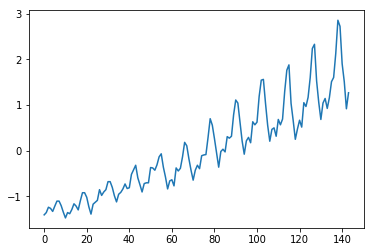

In [51]:
if __name__=='__main__':
    colabGDriveEnv = True
    if colabGDriveEnv == True:
      from google.colab import drive                                                                     
      drive.mount('/content/drive',force_remount=True)
      
    # https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line
    timeseries = load_series('/content/drive/My Drive/international-airline-passengers.csv')
    print(np.shape(timeseries))

    plt.figure()
    plt.plot(timeseries)
    plt.show()

